<a href="https://colab.research.google.com/github/SunainaMandal28/Amazon-/blob/main/Day5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                        #REGRESSION

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score , mean_absolute_error,mean_squared_error,r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
diabetes = load_diabetes()
diabetes


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
# to make data frame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
df["diabetes_progression"]=diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
#To know the null value
df.isna().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
#To find duplicate
df.drop_duplicates()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
df[df.duplicated(keep=False)]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression


In [ ]:
#duplicate dletion
df.drop_duplicates(inplace=True)

In [ ]:
#to check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   442 non-null    float64
 1   sex                   442 non-null    float64
 2   bmi                   442 non-null    float64
 3   bp                    442 non-null    float64
 4   s1                    442 non-null    float64
 5   s2                    442 non-null    float64
 6   s3                    442 non-null    float64
 7   s4                    442 non-null    float64
 8   s5                    442 non-null    float64
 9   s6                    442 non-null    float64
 10  diabetes_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


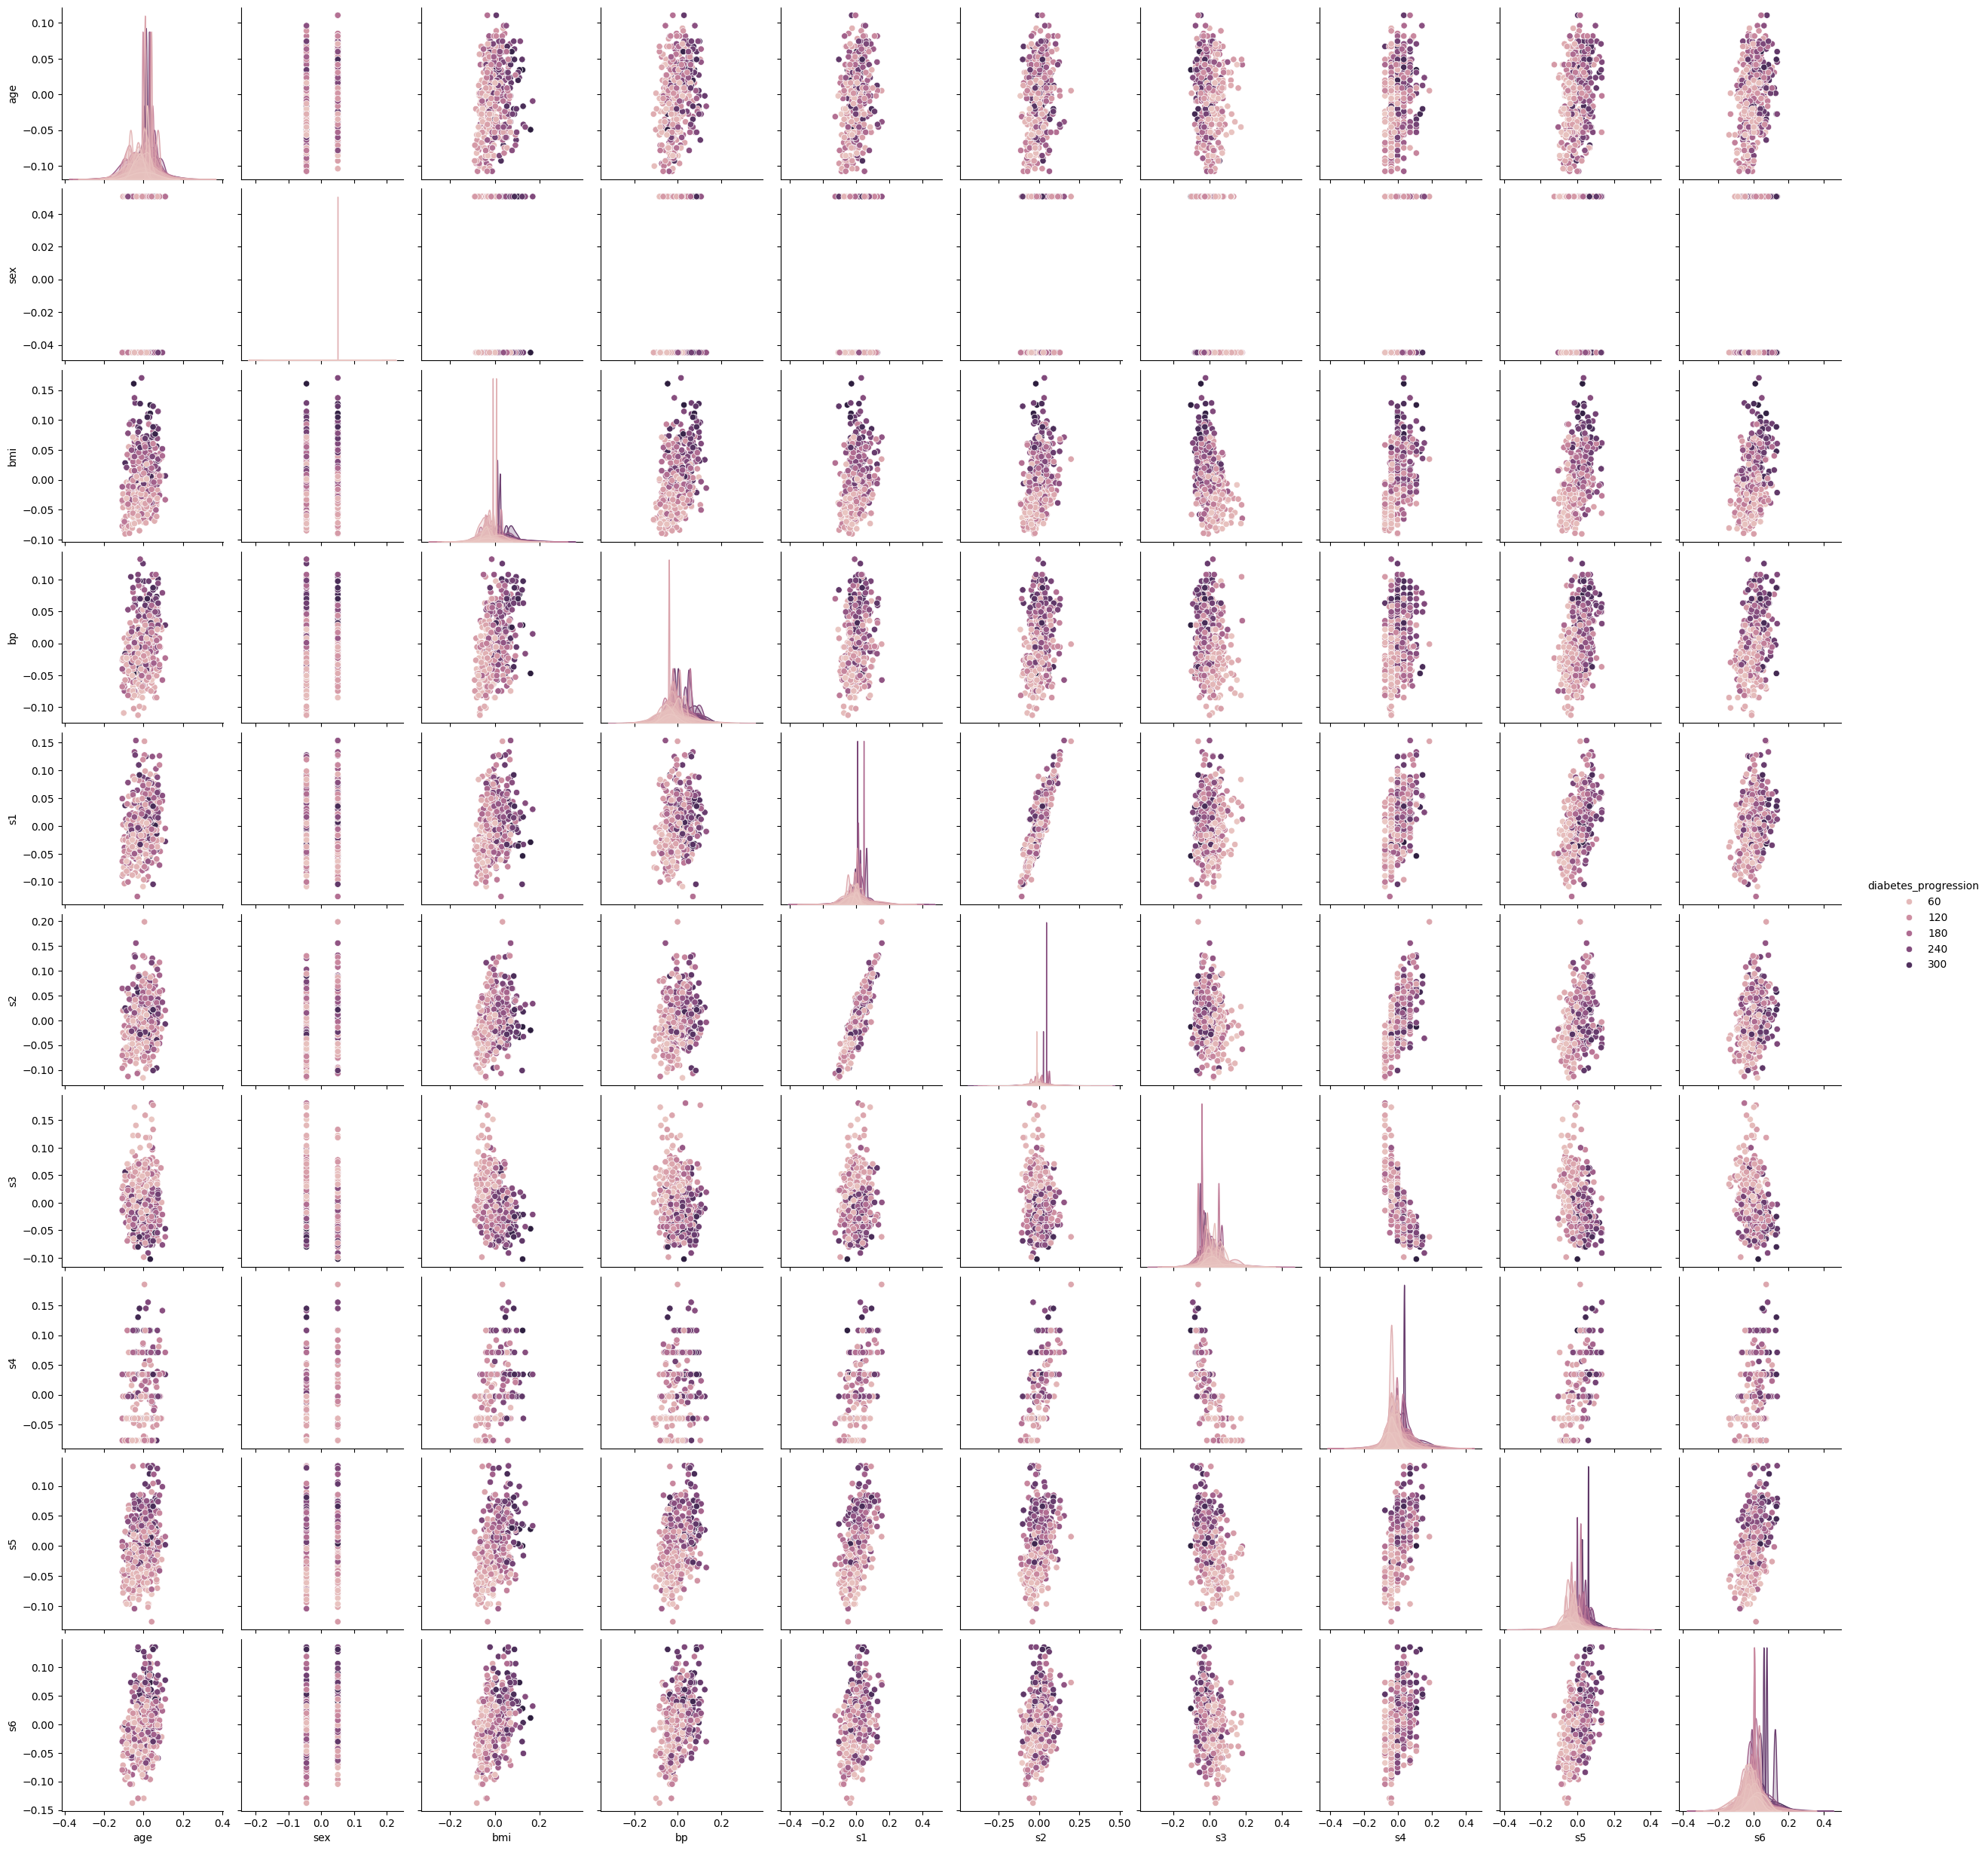

In [ ]:
#pairplot
sns.pairplot(df,hue='diabetes_progression')
plt.show()

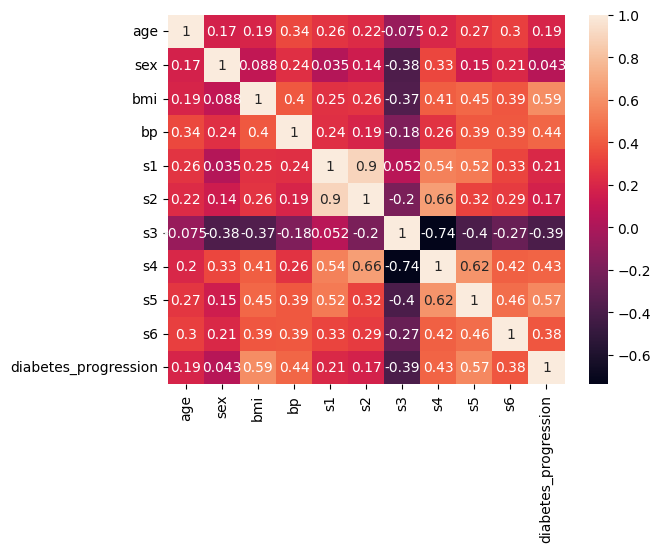

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#preparing data for train-test split
# X= diabetes.data
# Y=diabetes.target
# X.shape , Y.shape

In [ ]:
#dataframe use garera
X=df.drop(columns=['diabetes_progression'],axis=1)
y=df['diabetes_progression']

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
310,-0.005515,-0.044642,0.064930,0.035644,-0.001569,0.014970,-0.013948,0.000729,-0.018114,0.032059
65,-0.045472,0.050680,-0.024529,0.059744,0.005311,0.014970,-0.054446,0.071210,0.042341,0.015491
275,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011011,0.069338
334,-0.060003,0.050680,-0.047163,-0.022885,-0.071743,-0.057681,-0.006584,-0.039493,-0.062917,-0.054925
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036060,-0.042499


In [ ]:
X_train.shape

(353, 10)

In [ ]:
y_train.shape

(353,)

In [ ]:
X_test.shape


(89, 10)

In [ ]:
y_test.shape


(89,)

In [ ]:
#LInearREGREssion

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)
predict = reg.predict(X_test)

In [ ]:
print(f"Predict:{predict}")
print(f"Actual : {y_test}")

Predict:[ 89.94412785 173.60335656 213.38080171 217.89661039 153.9701675
 223.8077706  151.39524868  84.96259998 176.43549981 141.07987766
 168.28877947 119.08278101  51.69097061 166.79152635  70.17678081
 185.92399084 152.72890958 145.49534759  96.03321922 144.3725306
  56.17472668 261.24044608 136.78254163 139.42168644  68.80468205
 192.35762476 141.74727637 114.23873408 179.76147833  70.52108469
 163.44397673 148.47202145 125.03051387 161.22976524  94.6920707
  56.84902996 114.75682892  69.11595008 204.8745997  147.9838916
 154.46184318  70.31800018 165.22931274 150.02038975 194.58669883
 148.69062893  93.43939778 175.82371724  91.76481697 260.12583097
 217.43524908 166.38334376 230.26410402 212.054592   129.84559171
 193.39458414 118.39295725 133.73892854 119.92575904 167.95702221
 175.05415796  50.64220965 190.87814031 166.76890315 189.8047406
 116.40043189 243.66196394 227.57673989 147.3480179  218.07629058
 206.19399218 157.60847099 126.02421513 154.69930315 266.02033772
  85.10

In [ ]:
mean_absolute_error(y_test, predict)

52.25157273285386

In [ ]:
mean_squared_error(y_test, predict)

4189.696572705123

In [ ]:
r2_score(y_test, predict)

0.35116056151211605

In [ ]:
#RandomFrorestRegressor (algorithm for RegressionS)

In [ ]:
regr = RandomForestRegressor()
regr.fit(X, y)

RandomForestRegressor()

In [ ]:
print(f"Predict:{predict}")
print(f"Actual : {y_test}")

Predict:[ 89.94412785 173.60335656 213.38080171 217.89661039 153.9701675
 223.8077706  151.39524868  84.96259998 176.43549981 141.07987766
 168.28877947 119.08278101  51.69097061 166.79152635  70.17678081
 185.92399084 152.72890958 145.49534759  96.03321922 144.3725306
  56.17472668 261.24044608 136.78254163 139.42168644  68.80468205
 192.35762476 141.74727637 114.23873408 179.76147833  70.52108469
 163.44397673 148.47202145 125.03051387 161.22976524  94.6920707
  56.84902996 114.75682892  69.11595008 204.8745997  147.9838916
 154.46184318  70.31800018 165.22931274 150.02038975 194.58669883
 148.69062893  93.43939778 175.82371724  91.76481697 260.12583097
 217.43524908 166.38334376 230.26410402 212.054592   129.84559171
 193.39458414 118.39295725 133.73892854 119.92575904 167.95702221
 175.05415796  50.64220965 190.87814031 166.76890315 189.8047406
 116.40043189 243.66196394 227.57673989 147.3480179  218.07629058
 206.19399218 157.60847099 126.02421513 154.69930315 266.02033772
  85.10

In [ ]:
mean_absolute_error(y_test, predict)

52.25157273285386

In [ ]:
mean_squared_error(y_test, predict)

4189.696572705123

In [ ]:
r2_score(y_test, predict)

0.35116056151211605